In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Narayanganj.csv', encoding='unicode_escape')

C:\Users\Rana Hamid\AppData\Local\Temp\ipykernel_1320\3917778141.py:1: DtypeWarning: Columns (2,3,4,5,6,8,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Narayanganj.csv', encoding='unicode_escape')


In [6]:
df.isnull().sum()/len(df) * 100

Date             0.001245
Time            16.278375
SO2             60.068200
NO              32.387495
NO2             35.257368
NOX             28.202160
CO              43.896854
CO8hr           41.875747
O3              39.812326
O3 8hr          37.953007
PM2.5           32.287933
PM10            21.853843
Wind Speed      53.574273
Wind Dir        52.465402
Temperature     78.765930
RH              72.595579
Solar Rad       82.829301
BP              66.455098
Rain            64.470082
V Wind Speed    90.847770
dtype: float64

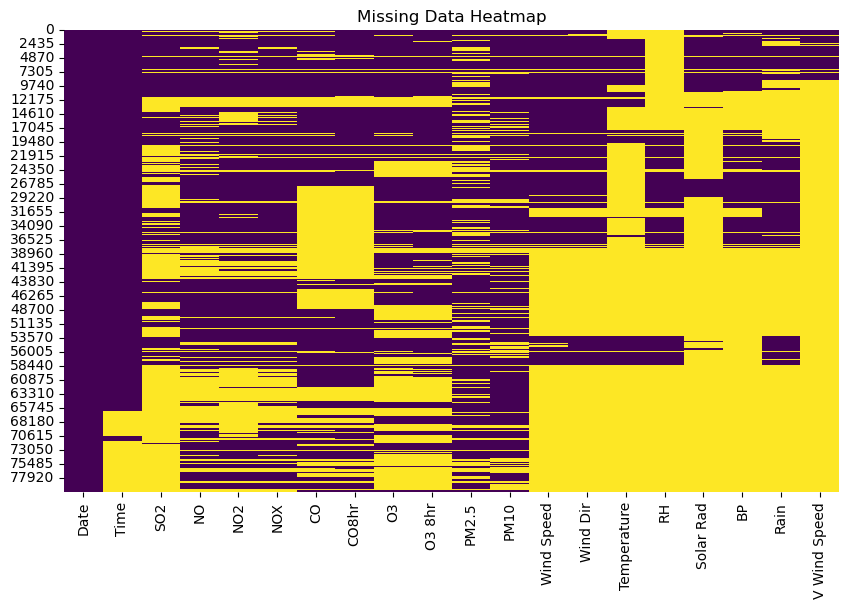

In [7]:
missing_data = df.isnull()

# Use seaborn to create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [3]:
df.drop(df.index[0], inplace=True)
df.drop(df.index[-1], inplace=True)

In [4]:
df_new = df[['Date','Time']].copy()
df_new['Date_Time'] = df_new['Date'] + ' ' + df_new['Time']
df_new['Date_Time'] = df_new.apply(lambda row: row['Date_Time'] if pd.notna(row['Time']) else row['Date'], axis=1)
df_new.drop(['Date','Time'], axis=1, inplace=True)

In [5]:
df_new[['SO2 (ppb)', 'NOx (ppb)', 'CO (ppm)', 'CO (8hr)', 'O3', 'O3 (8hr)',  'PM2.5 (ug/m3)', 'PM10 (ug/m3)']] = df[['SO2','NOX','CO','CO8hr','O3','O3 8hr','PM2.5','PM10']].copy()

In [6]:
df_new['SO2 (ppb)']=pd.to_numeric(df_new['SO2 (ppb)'], errors='coerce')
df_new['NOx (ppb)']=pd.to_numeric(df_new['NOx (ppb)'], errors='coerce')
df_new['CO (ppm)']=pd.to_numeric(df_new['CO (ppm)'], errors='coerce')
df_new['CO (8hr)']=pd.to_numeric(df_new['CO (8hr)'], errors='coerce')
df_new['O3']=pd.to_numeric(df_new['O3'], errors='coerce')
df_new['O3 (8hr)']=pd.to_numeric(df_new['O3 (8hr)'], errors='coerce')
df_new['PM2.5 (ug/m3)']=pd.to_numeric(df_new['PM2.5 (ug/m3)'], errors='coerce')
df_new['PM10 (ug/m3)']=pd.to_numeric(df_new['PM10 (ug/m3)'], errors='coerce')

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80350 entries, 1 to 80350
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date_Time      80350 non-null  object 
 1   SO2 (ppb)      32085 non-null  float64
 2   NOx (ppb)      57426 non-null  float64
 3   CO (ppm)       45078 non-null  float64
 4   CO (8hr)       46703 non-null  float64
 5   O3             48360 non-null  float64
 6   O3 (8hr)       49855 non-null  float64
 7   PM2.5 (ug/m3)  54406 non-null  float64
 8   PM10 (ug/m3)   62790 non-null  float64
dtypes: float64(8), object(1)
memory usage: 5.5+ MB


In [8]:
df_new.isnull().sum()

Date_Time            0
SO2 (ppb)        48265
NOx (ppb)        22924
CO (ppm)         35272
CO (8hr)         33647
O3               31990
O3 (8hr)         30495
PM2.5 (ug/m3)    25944
PM10 (ug/m3)     17560
dtype: int64

In [9]:
df_new.describe()

,SO2 (ppb),NOx (ppb),CO (ppm),CO (8hr),O3,O3 (8hr),PM2.5 (ug/m3),PM10 (ug/m3)
count,32085.000000,57426.000000,45078.000000,46703.000000,48360.000000,49855.000000,54406.000000,62790.000000
mean,10.507557,32.422047,1.265266,1.256857,5.456616,5.504509,101.123085,201.555939
std,14.195919,41.129218,1.071482,1.024851,6.032453,4.998786,99.778169,161.967054
min,0.050000,0.040000,0.010000,0.010000,0.020000,0.030000,0.030000,-14.030000
25%,2.270000,5.600000,0.470000,0.487500,1.840000,2.180000,26.370000,79.310000
50%,5.860000,16.370000,0.850000,0.890000,3.320000,3.910000,58.785000,152.310000
75%,13.680000,41.547500,1.850000,1.822500,6.670000,7.151250,151.610000,281.577500
max,251.010000,398.370000,10.520000,8.750000,77.580000,44.328571,647.650000,976.720000


In [10]:
df_new.nunique()

Date_Time        79293
SO2 (ppb)         4507
NOx (ppb)        12386
CO (ppm)          1009
CO (8hr)          6522
O3                3106
O3 (8hr)         15316
PM2.5 (ug/m3)    21710
PM10 (ug/m3)     31926
dtype: int64

In [11]:
df_new.to_csv('Data.csv', index=False)

In [12]:
df = df_new.copy()

In [13]:
df.head()

,Date_Time,SO2 (ppb),NOx (ppb),CO (ppm),CO (8hr),O3,O3 (8hr),PM2.5 (ug/m3),PM10 (ug/m3)
1,11/1/2012 01:00,5.05,22.12,0.88,NaN,0.18,NaN,68.32,84.27
2,11/1/2012 02:00,6.23,26.84,0.86,NaN,0.21,NaN,79.02,100.74
3,11/1/2012 03:00,6.30,31.43,0.83,NaN,0.19,NaN,110.64,133.44
4,11/1/2012 04:00,6.32,37.55,0.81,NaN,0.23,NaN,97.79,125.52
5,11/1/2012 05:00,6.00,36.56,0.79,NaN,0.12,NaN,120.86,142.32


In [14]:
df['Date_Time'] = df['Date_Time'].str.replace(' 24:00', ' 00:00')
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True, errors='coerce')

In [15]:
daily_avg = df.groupby(df['Date_Time'].dt.date).mean()
daily_avg.head()

,Date_Time,SO2 (ppb),NOx (ppb),CO (ppm),CO (8hr),O3,O3 (8hr),PM2.5 (ug/m3),PM10 (ug/m3)
Date_Time,,,,,,,,,
2012-01-11,2012-01-11 11:30:00,5.544583,22.977917,0.811250,0.722132,0.723333,0.890809,91.745652,154.165652
2012-01-12,2012-01-12 11:30:00,5.935000,38.001000,1.061000,1.256077,3.974000,2.462251,206.534000,235.335000
2012-02-11,2012-02-11 11:30:00,5.185833,15.049167,0.781667,0.848750,0.891818,1.366719,83.719583,150.599167
2012-02-12,2012-02-12 11:30:00,6.681875,41.185385,1.304545,0.820804,4.766923,6.233619,214.111667,242.520625
2012-03-11,2012-03-11 11:30:00,5.101667,13.022500,0.646250,0.660885,0.200000,0.246615,62.883913,102.994167


In [16]:
daily_avg['CO (8hr)'] = df.groupby(df['Date_Time'].dt.date).max()['CO (8hr)'].values
daily_avg['O3 (8hr)'] = df.groupby(df['Date_Time'].dt.date).max()['O3 (8hr)'].values
daily_avg.head()

,Date_Time,SO2 (ppb),NOx (ppb),CO (ppm),CO (8hr),O3,O3 (8hr),PM2.5 (ug/m3),PM10 (ug/m3)
Date_Time,,,,,,,,,
2012-01-11,2012-01-11 11:30:00,5.544583,22.977917,0.811250,0.97500,0.723333,1.568750,91.745652,154.165652
2012-01-12,2012-01-12 11:30:00,5.935000,38.001000,1.061000,2.06000,3.974000,7.257500,206.534000,235.335000
2012-02-11,2012-02-11 11:30:00,5.185833,15.049167,0.781667,1.28875,0.891818,3.660000,83.719583,150.599167
2012-02-12,2012-02-12 11:30:00,6.681875,41.185385,1.304545,1.54125,4.766923,7.192857,214.111667,242.520625
2012-03-11,2012-03-11 11:30:00,5.101667,13.022500,0.646250,0.81625,0.200000,0.711250,62.883913,102.994167


In [17]:

daily_avg = daily_avg[daily_avg.index.year != 2012]

AttributeError: 'Index' object has no attribute 'year'

In [ ]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

daily_avg["PM2.5_subindex"] = daily_avg["PM2.5 (ug/m3)"].apply(lambda x: get_PM25_subindex(x))

In [ ]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

daily_avg["PM10_subindex"] = daily_avg["PM10 (ug/m3)"].apply(lambda x: get_PM10_subindex(x))

In [ ]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

daily_avg["SO2_subindex"] = daily_avg["SO2 (ppb)"].apply(lambda x: get_SO2_subindex(x))

In [ ]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

daily_avg["NOx_subindex"] = daily_avg["NOx (ppb)"].apply(lambda x: get_NOx_subindex(x))

In [ ]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

daily_avg["CO_subindex"] = daily_avg["CO (8hr)"].apply(lambda x: get_CO_subindex(x))


In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

daily_avg["O3_subindex"] = daily_avg["O3 (8hr)"].apply(lambda x: get_O3_subindex(x))


In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

daily_avg["Checks"] = (daily_avg["PM2.5_subindex"] > 0).astype(int) + \
                (daily_avg["PM10_subindex"] > 0).astype(int) + \
                (daily_avg["SO2_subindex"] > 0).astype(int) + \
                (daily_avg["NOx_subindex"] > 0).astype(int) + \
                (daily_avg["CO_subindex"] > 0).astype(int) + \
                (daily_avg["O3_subindex"] > 0).astype(int)

In [ ]:
daily_avg["AQI_calculated"] = round(daily_avg[["PM2.5_subindex", "PM10_subindex", "SO2_subindex", "NOx_subindex",
                                 "CO_subindex", "O3_subindex"]].max(axis = 1))

daily_avg.loc[daily_avg["PM2.5_subindex"] + daily_avg["PM10_subindex"] <= 0, "AQI_calculated"] = np.NaN
daily_avg.loc[daily_avg.Checks < 3, "AQI_calculated"] = np.NaN

daily_avg["AQI_bucket_calculated"] = daily_avg["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

In [ ]:
df['Date_Time'] = df['Date_Time'].str.replace(' 24:00', ' 00:00')

In [ ]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True, errors='coerce')

In [ ]:
df.set_index('Date_Time', inplace=True)
df = df[df.index.year != 2012]

In [ ]:
# Resample to monthly frequency and calculate monthly mean
monthly_avg = df.resample('M').mean()

# Group by month and calculate mean across all years
monthly_mean_all_years = monthly_avg.groupby(monthly_avg.index.month).mean()

# Plotting
pollutants = ['SO2 (ppb)', 'NOx (ppb)', 'CO (ppm)', 'CO (8hr)', 'O3', 'O3 (8hr)', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)']

for pollutant in pollutants:
    plt.figure(figsize=(4, 2.5))
    plt.xticks(rotation = 90)
    ax = sns.barplot(x='Date_Time', y=f'{pollutant}', data=monthly_mean_all_years, palette=sns.color_palette("husl", 12), saturation=0.65, linewidth= 0.5)
    ax.set_title(f'Monthly Average of {pollutant}', fontsize = 10)
    ax.set_xlabel('Month', fontsize= 8)
    ax.set_ylabel(f'{pollutant}', fontsize = 8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

In [ ]:

yearly_avg = df.resample('Y').mean()

yearly_mean_all_years = yearly_avg.groupby(yearly_avg.index.year).mean()

pollutants = ['SO2 (ppb)', 'NOx (ppb)', 'CO (ppm)', 'CO (8hr)', 'O3', 'O3 (8hr)', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)']

for pollutant in pollutants:
    plt.figure(figsize=(4, 2.5))
    plt.xticks(rotation = 90)
    ax = sns.barplot(x='Date_Time', y=f'{pollutant}', data=yearly_mean_all_years, palette=sns.color_palette("husl", 12), saturation=0.65, linewidth= 0.5)
    ax.set_title(f'Yearly Average of {pollutant}', fontsize = 10)
    ax.set_xlabel('Year', fontsize= 8)
    ax.set_ylabel(f'{pollutant}', fontsize = 8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

In [ ]:
# Extract year from the index
df['Year'] = df.index.year

# Group by year and calculate percentage of missing values
missing_percentage = df.groupby(df['Year']).apply(lambda x: (x.isnull().sum() / len(x)) * 100)


table_string = missing_percentage.to_string()

# Print the table
print(table_string)